In [1]:
#Importing libraries and python files like Luke's Saha file
import saha
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import scipy.constants as sc

In [2]:
#Placing all data from Skynet into an array
hf = h5py.File("SkyNet_r-process.h5")

In [3]:
#This section defines temperature, time, and the extended parts of it.
temperature = hf["Temperature"]
time = hf["Time"]
mod_temp = []
full_temp = []

linear = np.polyfit(np.log10(np.array(time[900:1700])),np.log10(np.array(temperature[900:1700])),1)
m = linear[0]

#m = (np.log10(temperature[1700]) - np.log10(temperature[1600])) / (np.log10(time[1700]) - np.log10(time[1600]))

for i in range(0,len(temperature)):
    if i < 1700:
        mod_temp.append(np.log10(temperature[i]))
        full_temp.append(temperature[i])
    else:
        del_t = m*(np.log10(time[i]) - np.log10(time[i-1]))
        mod_temp.append(mod_temp[i-1]+del_t)
        full_temp.append(10**mod_temp[i])

In [4]:
## Trying to extract the data for abundances for Samarium
abundance = hf["Y"]
mass = hf["A"]
charge = hf["Z"]
index_list = []
full_abundance = []

for i in range(len(charge)):
    if charge[i] == 62: ##charge of samarium
        index_list.append(i)
        
full_abundance = np.sum(abundance[:, index_list], 1)

In [5]:
zero_nan = []
for i in full_abundance:
    if i == 0:
        zero_nan.append(1)
    elif i == 'NaN':
        zero_nan.append(2)
    else:
        zero_nan.append(0)

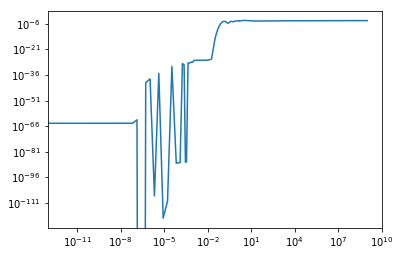

In [6]:
plt.loglog(time,full_abundance)

In [7]:
#Initializing arrays for density, potentials, Ye
kbEvpGK = 8.617e-5*1e9
density = hf["Density"]
electron_full = np.array(hf["Ye"])
#NOTE THAT THESE VALUES ARE SLIGHTLY DIFFERENT THAN THE CURRENT NIST VALUES
ion_potential = np.array([5.643710e+00, 1.107800e+01, 2.355000e+01, 4.164000e+01,
        6.270000e+01, 8.700000e+01, 1.030000e+02, 1.180000e+02,
        1.410000e+02, 1.580000e+02, 1.790000e+02, 2.080000e+02,
        2.370000e+02, 2.570000e+02, 2.760000e+02, 3.065000e+02,
        4.740000e+02, 5.060000e+02, 5.430000e+02, 5.810000e+02,
        6.170000e+02, 6.580000e+02, 7.020000e+02, 7.420000e+02,
        7.820000e+02, 8.220000e+02, 9.760000e+02, 1.016000e+03,
        1.060000e+03, 1.103000e+03, 1.180000e+03, 1.226000e+03,
        1.332000e+03, 1.381560e+03, 2.371000e+03, 2.466000e+03,
        2.569000e+03, 2.676000e+03, 2.782000e+03, 2.887000e+03,
        3.028000e+03, 3.137000e+03, 3.253000e+03, 3.363000e+03,
        3.669000e+03, 3.766000e+03, 3.873000e+03, 3.971000e+03,
        4.227000e+03, 4.337000e+03, 4.548000e+03, 4.655000e+03,
        1.049400e+04, 1.076200e+04, 1.106000e+04, 1.133700e+04,
        1.226400e+04, 1.258800e+04, 1.299200e+04, 1.326285e+04,
        5.398612e+04, 5.521423e+04])


Z = 62
f = .3
ion_potential

array([5.643710e+00, 1.107800e+01, 2.355000e+01, 4.164000e+01,
       6.270000e+01, 8.700000e+01, 1.030000e+02, 1.180000e+02,
       1.410000e+02, 1.580000e+02, 1.790000e+02, 2.080000e+02,
       2.370000e+02, 2.570000e+02, 2.760000e+02, 3.065000e+02,
       4.740000e+02, 5.060000e+02, 5.430000e+02, 5.810000e+02,
       6.170000e+02, 6.580000e+02, 7.020000e+02, 7.420000e+02,
       7.820000e+02, 8.220000e+02, 9.760000e+02, 1.016000e+03,
       1.060000e+03, 1.103000e+03, 1.180000e+03, 1.226000e+03,
       1.332000e+03, 1.381560e+03, 2.371000e+03, 2.466000e+03,
       2.569000e+03, 2.676000e+03, 2.782000e+03, 2.887000e+03,
       3.028000e+03, 3.137000e+03, 3.253000e+03, 3.363000e+03,
       3.669000e+03, 3.766000e+03, 3.873000e+03, 3.971000e+03,
       4.227000e+03, 4.337000e+03, 4.548000e+03, 4.655000e+03,
       1.049400e+04, 1.076200e+04, 1.106000e+04, 1.133700e+04,
       1.226400e+04, 1.258800e+04, 1.299200e+04, 1.326285e+04,
       5.398612e+04, 5.521423e+04])

In [8]:
YI = saha.GetAbundances(full_abundance,np.array(full_temp),np.array(density),np.array(ion_potential))


C:\Users\prana\Documents\Research\R-process_Mergers\Abundance_Calculations\saha.py:96: RuntimeWarning: divide by zero encountered in log
  fLow = np.log(GetYefContribution(Ytot, T9, rho, lnYefLow, xi)) - lnYefLow
C:\Users\prana\Documents\Research\R-process_Mergers\Abundance_Calculations\saha.py:97: RuntimeWarning: divide by zero encountered in log
  fHi = np.log(GetYefContribution(Ytot, T9, rho, lnYefHi, xi)) - lnYefHi
C:\Users\prana\Documents\Research\R-process_Mergers\Abundance_Calculations\saha.py:108: RuntimeWarning: divide by zero encountered in log
  fMid = np.log(GetYefContribution(Ytot, T9, rho, lnYefMid, xi)) - lnYefMid


In [11]:
np.shape(YI)
pd_YI = pd.DataFrame(YI)
pd_YI

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869509e-129,6.890581e-120,9.733025e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869509e-129,6.890581e-120,9.733026e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427886e-147,3.439394e-138,4.869510e-129,6.890581e-120,9.733026e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427887e-147,3.439394e-138,4.869510e-129,6.890582e-120,9.733027e-111,1.373940e-101,1.937976e-92,2.732131e-83,3.560009e-74,4.627743e-65
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427887e-147,3.439395e-138,4.869511e-129,6.890583e-120,9.733029e-111,1.373940e-101,1.937976e-92,2.732132e-83,3.560010e-74,4.627744e-65
5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427888e-147,3.439396e-138,4.869513e-129,6.890585e-120,9.733032e-111,1.373941e-101,1.937977e-92,2.732133e-83,3.560011e-74,4.627746e-65
6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427890e-147,3.439399e-138,4.869516e-129,6.890590e-120,9.733039e-111,1.373942e-101,1.937979e-92,2.732134e-83,3.560014e-74,4.627749e-65
7,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427893e-147,3.439403e-138,4.869523e-129,6.890600e-120,9.733053e-111,1.373944e-101,1.937981e-92,2.732138e-83,3.560019e-74,4.627756e-65
8,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427900e-147,3.439413e-138,4.869537e-129,6.890619e-120,9.733080e-111,1.373948e-101,1.937987e-92,2.732146e-83,3.560029e-74,4.627769e-65
9,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.427914e-147,3.439433e-138,4.869564e-129,6.890659e-120,9.733136e-111,1.373956e-101,1.937998e-92,2.732162e-83,3.560049e-74,4.627796e-65


In [13]:
#YI = saha.GetAbundancesFixedYef(full_abundance,np.array(full_temp),np.array(density),np.log(62*full_abundance), np.array(ion_potential))


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'Abundance')

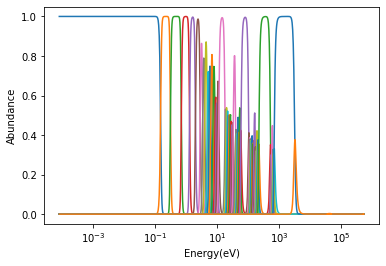

In [8]:
Ytot = np.sum(YI,1)
for i in range(len(ion_potential)):
    plt.semilogx(kbEvpGK*np.array(full_temp),YI[:,i]/Ytot)
    #plt.plot([ion_potential[i], ion_potential[i]], [0, 1])

#plt.ylim([1.e-5, 1])
#plt.xlim([0.05, 1e4])
plt.xlabel("Energy(eV)")
plt.ylabel("Abundance")

In [14]:
print (ion_potential)

[5.643710e+00 1.107800e+01 2.355000e+01 4.164000e+01 6.270000e+01
 8.700000e+01 1.030000e+02 1.180000e+02 1.410000e+02 1.580000e+02
 1.790000e+02 2.080000e+02 2.370000e+02 2.570000e+02 2.760000e+02
 3.065000e+02 4.740000e+02 5.060000e+02 5.430000e+02 5.810000e+02
 6.170000e+02 6.580000e+02 7.020000e+02 7.420000e+02 7.820000e+02
 8.220000e+02 9.760000e+02 1.016000e+03 1.060000e+03 1.103000e+03
 1.180000e+03 1.226000e+03 1.332000e+03 1.381560e+03 2.371000e+03
 2.466000e+03 2.569000e+03 2.676000e+03 2.782000e+03 2.887000e+03
 3.028000e+03 3.137000e+03 3.253000e+03 3.363000e+03 3.669000e+03
 3.766000e+03 3.873000e+03 3.971000e+03 4.227000e+03 4.337000e+03
 4.548000e+03 4.655000e+03 1.049400e+04 1.076200e+04 1.106000e+04
 1.133700e+04 1.226400e+04 1.258800e+04 1.299200e+04 1.326285e+04
 5.398612e+04 5.521423e+04]


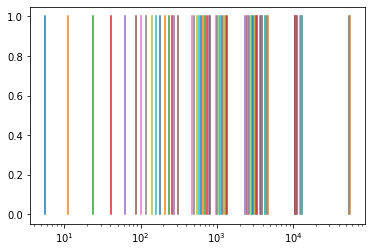

In [9]:
for xi in ion_potential: 
    plt.semilogx([xi, xi], [0, 1])

In [10]:
np.shape(YI)

(2198, 63)